In [1]:
import pandas as pd

### Creating data
There are two core objects in pandas: the DataFrame and the Series

#### DataFrame 
It is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

In [2]:
pd.DataFrame({'Yes':[50,21], 'No': [131,2]})

,Yes,No
0,50,131
1,21,2


In [3]:
pd.DataFrame({'Bob':['I liked it.','It was awful.'], 'Sue': ['Pretty good.', "Bland"]})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland


The dictionary-list constructor assigns values to the column labels, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the row labels. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an Index. We can assign values to it by using an index parameter in our constructor:

In [4]:
pd.DataFrame({'Bob':['I like it.', 'It was awful'],'Sue':['Pretty good', 'Blad']},index=['Product A', 'Product B'])

,Bob,Sue
Product A,I like it.,Pretty good
Product B,It was awful,Blad


#### Series
A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [5]:
pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [6]:
pd.Series([30,35,40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

### Reading data files
Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

In [10]:
iris_review = pd.read_csv('iris.txt', delimiter='\t')
#We can use the shape attribute to check how large the resulting DataFrame is:
iris_review.shape

(150, 5)

We can examine the contents of the resultant DataFrame using the head() command, which grabs the first five rows:

In [11]:
iris_review.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Example:
## Powerlifters Database
#### Context
This dataset is a snapshot of the OpenPowerlifting database as of April 2019. OpenPowerlifting is creating a public-domain archive of powerlifting history. Powerlifting is a sport in which competitors compete to lift the most weight for their class in three separate barbell lifts: the Squat, Bench, and Deadlift.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df1 = pd.read_csv('meets.csv')

In [44]:
df1.shape

(8482, 8)

In [45]:
df1.head(2)

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic


In [46]:
df1["Date"] = pd.to_datetime(df1['Date'])

In [47]:
df1['Month'] = df1['Date'].apply(lambda x:x.month)
df1['Year'] = df1['Date'].apply(lambda x:x.year)

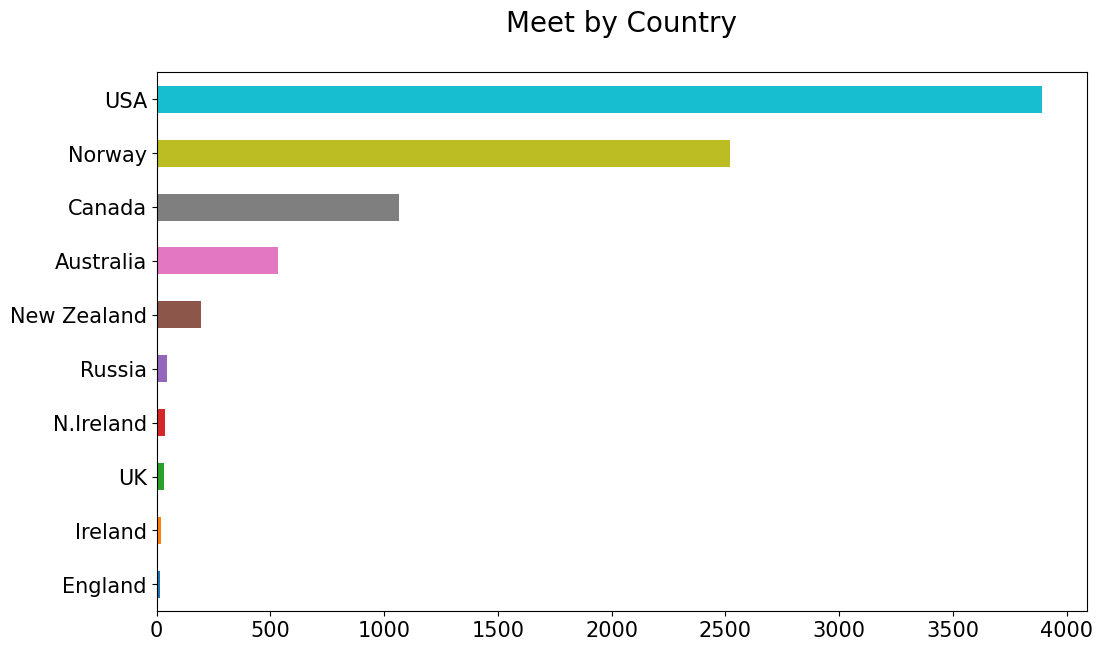

Meets by Country:

USA            3894
Norway         2521
Canada         1066
Australia       532
New Zealand     195
Russia           43
N.Ireland        36
UK               34
Ireland          21
England          16
Name: MeetCountry, dtype: int64


In [50]:

plt.figure(figsize=(12,7))
df1['MeetCountry'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', color=['C0','C1','C2','C3', 'C4','C5','C6','C7','C8','C9'])

plt.title('Meet by Country\n', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

print('Meets by Country:\n')
print(df1['MeetCountry'].value_counts()[:10])


U.S.A. is number one. Not too surprising to know Americans have the most meets, considering the population and economy of the United States. However, meets per capita of Norway, Canada, Australia and New Zealand are all higher than the United States.

In [52]:
#Current country populations, as of January 1, 2020

USPop = 331002651
NORWAYPop = 5421241
CANADAPop = 37742154
AUSTRALIAPop = 25499884
NEWZEALANDPop = 4822233


perCapDict = {'United States': len(df1[df1['MeetCountry']=='USA']) / USPop * 100000,
            'Norway': len(df1[df1['MeetCountry']=='Norway']) / NORWAYPop * 100000,
            'Canada': len(df1[df1['MeetCountry']=='Canada']) / CANADAPop * 100000,
            'Australia': len(df1[df1['MeetCountry']=='Australia']) / AUSTRALIAPop * 100000,
            'New Zealand': len(df1[df1['MeetCountry']=='New Zealand']) / NEWZEALANDPop * 100000}

perCapDf = pd.Series(perCapDict)



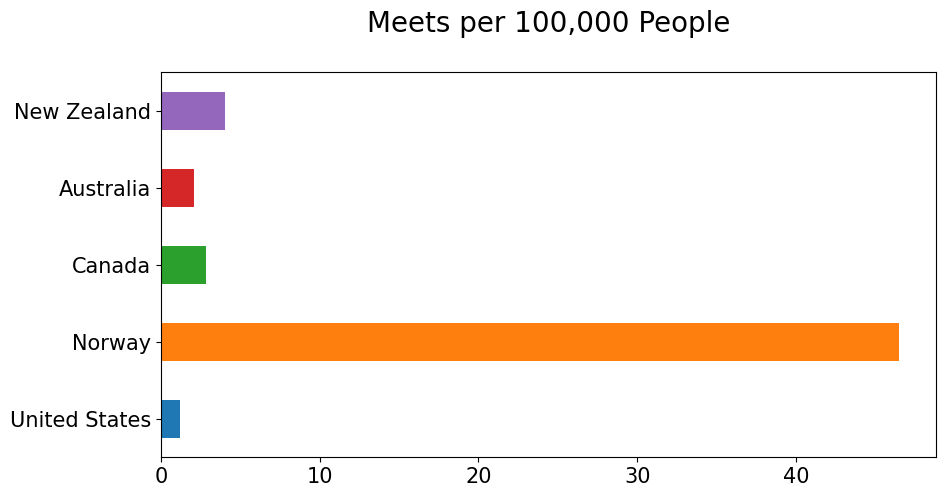

Meets per 100,000 People

United:  1.18
Norway:  46.5
Canada:  2.82
Austra:  2.09
New Ze:  4.04


In [55]:
plt.figure(figsize=(10,5))
perCapDf.plot(kind='barh', color=['C0','C1','C2','C3', 'C4'])
plt.title('Meets per 100,000 People\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Meets per 100,000 People\n')
for k,v in perCapDict.items():
    print(k[:6] + ': ',(round(v,2)))